# Chapter 13. 합성곱 신경망
## Convolutional neural-network<br/>

<li>사람의 지각 대부분은 의식 영역 밖에 있는 뇌의 특별한 시각, 청각, 그리고 다른 감각기관에서 일어난다.</li>
<li>감각의 정보가 우리 의식에 도달할 때는 이미 고수준의 특성으로 채워져 있게 된다.</li>

예를 들어, 귀여운 강아지를 보았을 때 우리는 강아지를 보지 않거나 귀여움을 느끼지 않았다고 선택할 수 없다.<br>
또한, 어떻게 귀여운 강아지를 인식했는 지를 설명할 수 없다.<br><br>



<li>합성곱 신경망은 대뇌의 시각 피질 연구로 부터 시작되었으며, 1980년대부터 이미지 인식 분야에 사용되었다.</li>
<li>CNN은 시각 분야에 국한되지 않고, 음성 인식이나 자연어 처리 같은 다른 작업에도 많이 사용된다.</li>

## 13.1 시각 피질의 구조

데이비드 허블(David H. Hubel)과 토르스텐 비셀(Torsten Wiesel)은<br>
1958년과 1959년에 시각 피질의 구조에 대한 결정적인 통찰을 제공한 고양이 실험을 연속해서 수행했으며, <br>
실험을 시각 피질 안의 많은 뉴런이 작은 **국부 수용장(local recetpive field)**를 가진다는 것을 보였다. <br>

<center><img src="images/13-1.png" width="80%" height="80%"></center>  <br>
 

<li>이는 뉴런들이 시야의 일부 범위 안에 있는 시각 자극에만 반응한다는 뜻이다.  </li>
<li>뉴런의 수용장들은 서로 겹칠 수 있어 합치면 전체 시야를 감싸게 된다.  </li>
<li>거기에 더해 어떤 뉴런은 수평선의 이미지에만 반응하고 반면 다른 뉴런은 다른 각도의 선분에 반응한다.  </li>
<li>또한, 어떤 뉴런은 큰 수용장을 가져서 저수준의 패턴이 조합된 더 복잡한 패턴에 반응한다.  </li>


4가지의 관찰을 통해, **"고수준 뉴런이 이웃한 저수준 뉴런의 출력에 기반한다."**는 아이디어를 이끌어 낼 수 있었으며, <br>
이러한 강력한 구조가 전체 시야 영역에 포함된 모든 종류의 복잡한 패턴을 감지할 수 있도록 만든다. <br>
이러한 시각 피질에 대한 연구는 1980년에 소개된 신인식기에 영감을 주었고, <br>
우리가 지금 합성곱 신경망이라고 부르는 것으로 점진적으로 진화되었다.   <br>

1998년 얀 르쿤(Yann LeCun), 레옹 보토(Leon Bottou), 요슈아 벤지오(Yoshua Bengio)와 <br>
패트릭 하프너(Patrick Haffner)의 논문이 중요한 전환점이 되었다.  
해당 논문에서는 수표에 쓰인 손글씨 숫자를 인식하는 데 널리 사용된 LeNet-5 구조를 소개했다.  
LeNet-5 구조는 우리에게 익숙한 완전 연결 층과 시그모이드 활성화 함수 같은 구성 요소뿐만 아니라, <br>
합성곱층(Convolutiona layer)과 풀링층(Pooling layer)라는 새로운 구성 요소도 소개한다.

## 13.2 합성곱층

**합성곱층(Convolutional layer)**는 CNN의 가장 중요한 구성 요소이다. <br> <br>
첫 번째 합성곱층의 뉴런은 입력 이미지의 모든 픽셀에 연결되는 것이 아니라 합성곱층 뉴런의 수용장 안에 있는 픽셀에만 연결된다.  
두 번째 합성곱층에 있는 각 뉴런은 첫 번째 층의 작은 사각 영역 안에 위치한 뉴런에 연결 된다.  

이런 구조는 네트워크가 첫 번째 은닉층에서는 저수준 특성에 집중하고, 그 다음 은닉층에서는 고수준 특성으로 조합해 나가도록 도와준다.  
이런 계층적 구조는 실제 이미지에서 흔히 볼 수 있으며, 이는 CNN이 이미지 인식에 잘 작동하는 이유 중 하나이다.

<center><img src="images/13-2.png" width="80%" height="80%"></center>  <br>

<li>지금까지 살펴본 모든 다층 신경망의 층은 한 줄로 길게 늘어선 뉴런으로 구성되어있었다. </li>
<li>그래서 입력 이미지를 신경망에 주입하기 전에 1D 배열로 펼쳐야 했다. </li>
<li>하지만, 여기서는 각 층이 2D로 표현되므로 뉴런을 그에 상응하는 입력과 연결하기 더 쉽다.  </li>

어떤 층의 i행, j열에 있는 한 뉴런은 이전 층의 i에서 i+fh-1까지의 행과 j에서 j+fw-1까지의 열에 있는 뉴런의 출력에 연결된다.  
여기서 fh와 fw는 이 수용장의 높이와 너비다. 
아래의 그림과 같이 높이와 너비를 이전 층과 같게 하기 위해 입력의 주위에 0을 추가하는 것이 일반적이다.  
이를 **제로 패딩(Zero padding)**이라고 한다.  

<center><img src="images/13-3.png" width="80%" height="80%"></center>  

[그림 13-4]에서처럼 수용장 사이에 간격을 두어 큰 입력층을 훨씬 작은 층에 연결하는 것도 가능하다.  
연속된 두 개의 수용장 사이의 거리를 **스트라이드(stride)**라고 한다.  

이 그림에서는 (제로 패딩이 적용된) 5x7입력층이 3x3수용장과 스트라이드 2를 사용하여 3x4층에 연결되었다.  
상위층의 i행, j열에 있는 뉴런이 이전 층의 ixSh에서 ixSh+fh-1까지의 행과 jxSw에서 jxSw+fw-1까지의 열에 위치한 뉴런과 연결된다.  
여기서 Sh와 Sw는 스트라이드의 수직 값과 수평 값이다.
<center><img src="images/13-4.png" width="80%" height="80%"></center>

### 13.2.1 필터
뉴런의 가중치는 수용장 크기의 작은 이미지로 표현될 수 있다. <br>
예를 들어 [그림 13-5]는 **필터filter(또는 합성곱 커널Convolution kernel)**라 부르는 두 개의 가중치 세트를 보여준다.

<center><img src="images/13-5.png" width="80%" height="80%"></center> 

**첫 번째 필터**는 가운데 흰 수직선이 있는 검은 사각형이다. (가운데 열은 1로 채워져 있고 그 외에는 모두 0인 7x7행렬)  <br>
이런 가중치를 사용한 뉴런은 가운데 수직선 부분을 제외하고는 수용장에 있는 모든 것을 무시한다.<br>
(가운데 위치한 수직선 부분을 제외하고는 입력에 모두 0이 곱해지기 때문에)<br>

**두 번째 필터**는 가운데 흰 수평선이 있는 검은 사각형이다. <br>
여기에서도 이 가중치를 사용한 뉴런은 수평선 부분을 제외하고는 수용장 안의 모든 것을 무시할 것이다.<br><br>

<li>[그림 13-5]의 입력 이미지를 네트워크에 주입하고 한 층의 모든 뉴런에 같은 수직선 필터를(그리고 같은 편향을) 적용하면, <br>
    이 층은 왼쪽 위의 이미지를 출력할 것이다. 흰 수직선은 강조되고 나머지는 희미해 졌다. <br> </li>
<li>비슷하게 오른쪽 위의 이미지는 모든 뉴런에 수평선 필터를 적용했을 때 얻은 것이다. 흰 수평선은 강조되고 나머지는 희미해졌다.  </li>

완전 연결 신경망과 달리 대부분 CNN그림에는 편향이 표현되지 않는 경우가 많다. <br>
CNN에서는 하나의 필터와 편향으로 한 개의 특성 맵이 만들어진다.<br>

그러므로 같은 필터를 사용한 전체 뉴런의 층은 필터와 유사한 이미지 영역을 강조하는 특성맵(feature map)을 만든다.  
훈련 과정에서 CNN은 해당 문제에 가장 유용한 필터를 찾고 이들을 연결하여 더 복잡한 패턴을 학습한다.  
(예를 들어 한 이미지에서 십자 표시는 수직 필터와 수평 필터가 모두 활성화된 영역이다.)

In [5]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

C:\Users\SANGWON\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


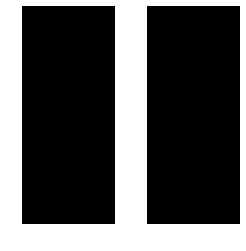

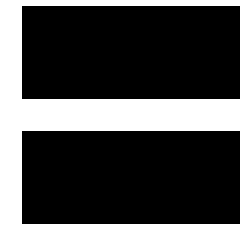

In [6]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [7]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [8]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

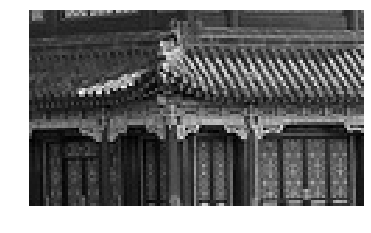

In [9]:
plot_image(images[0, :, :, 0])
save_fig("china_original_small", tight_layout=False)
plt.show()

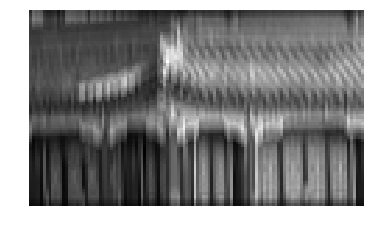

In [10]:
plot_image(output[0, :, :, 0]) # 수직선
save_fig("china_vertical", tight_layout=False)
plt.show()

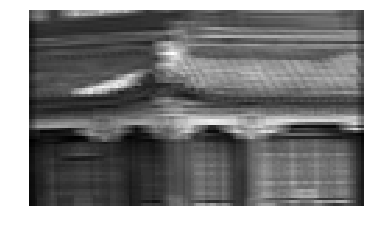

In [11]:
plot_image(output[0, :, :, 1]) # 수평선
save_fig("china_horizontal", tight_layout=False)
plt.show()

### 13.2.2 여러 개의 특성 맵 쌓기
위에서는 단순함을 유지하기 위해 합성곱층을 얇은 2D층으로 표현했지만,  <br>
실제로는 같은 크기의 여러 개의 특성 맵으로 구성되어 있어서 3D로 표현하는 것이 더 정확하다.  <br><br>

<center><img src="images/13-6.png" width="80%" height="80%"></center>

하나의 특성 맵 안에서는 모든 뉴런이 같은 파라미터(가중치와 편향)를 공유하지만, 다른 특성 맵은 다른 파라미터를 가진다.  
한 뉴런의 수용장은 앞서 설명한 것과 같지만, 이전 층에 있는 모든 특성 맵에 걸쳐 확장 된다.  
--> 간단히 말하면, 하나의 합성곱층이 입력에 여러 개의 필터를 동시에 적용하여 입력에 있는 여러 특성을 감지할 수 있다.  
또한, 입력 이미지는 컬러 채널(Color channel)마다 하나씩 여러 개의 서브층으로 구성되기도 한다. 컬러 채널은 전형적으로 빨강, 초록, 파랑(RGB)세가지이다. 흑백 이미지는 하나의 채널만 가진다. 하지만 어떤 이미지는 매우 많은 채널을 가질 수 있다.  

예를들어, 위성 이미지는 가시광선 외에도 (적외선 같은) 다른 빛의 파장이 기록된다.   

구체적으로 보면, 합성곱층 l에 있는 k특성 맵의 i행, j열에 위치한 뉴런은 이전 l-1층에 있는 모든 특성 맵의 ixSh에서 ixSh+fh-1까지의 행과 ixSw에서 ixSw+fw-1까지의 열에 있는 뉴런의 출력에 연결된다.  
다른 특성 맵이더라도 같은 i행과 j열에 있는 뉴런이라면 정확히 이 전 층에 있는 동일한 뉴런들의 출력에 연결된다.

[식13-1]은 앞의 설명을 하나의 큰 수학식으로 정리한 것이다. 이 시은 합성곱층에서 한 뉴런의 출력을 계산하는 법을 보여준다. 첨자가 모두 달라서 보기 어렵지만, 입력에 대한 가중치 합을 계산하고 편향을 더하는 것이 전부다.  

<center><img src="images/fomula13-1.png" width="80%" height="80%"></center>  










### 13.2.3 텐서플로 구현  
텐서플로에서 각 입력 이미지는 보통 [높이, 너비, 채널] 형태의 3D 텐서로 표현된다.  
하나의 미니배치는 [미니배치 크기, 높이, 너비, 너비, 채널] 형태의 4D텐서로 표현된다.  
합성곱층의 가중치는 [fh, fw, fn', fn] 형태의 4D텐서로 표현되며, 합성곱층의 편향은 간단하게 [fn]형태의 1D텐서로 나타난다.  

다음은 CNN을 구현한 간단한 예제이다.<br><br>

<li>사이킷 런의 load_sample_images()를 사용하여 두개의 샘플이미지를 로드한다.(두 개의 컬러이미지로, 하나는 중국 사원이고 다른 하나는 꽃이다.) </li> 
<li>그 다음에 7x7필터 두 개를 만든다.(하나는 가운데에 흰 수직선이 있고 다른 하나는 가운데 흰 수평선이 있다.), </li>
<li>텐서플로의 tf.nn.conv2d() 함수로(제로 패딩과 스트라이드 2로)만든 합성곱층을 두 이미지에 적용한다. </li>
<li>마지막으로, 만들어진 특성 맵 중 하나를 그린다.</li>

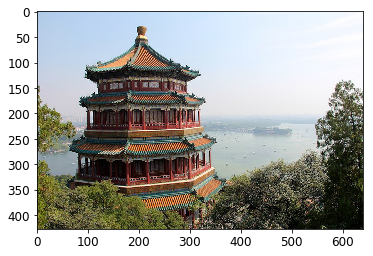

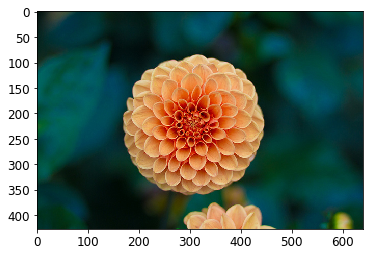

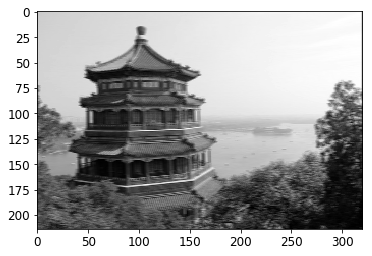

In [12]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image
import matplotlib.pylab as plt

# 샘플 이미지를 로드
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

plt.imshow(china)
plt.show()
plt.imshow(flower)
plt.show()

# 2개의 필터를 만듬
filters = np.zeros(shape=(7,7,channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # 수직선
filters[3, :, :, 1] = 1 # 수평선

# 입력 X와 2개의 필터를 적용한 합성곱층의 그래프를 만듬
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding= "SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})
    
    
plt.imshow(output[0, :, :, 1], cmap="gray") # 첫 번째 이미지의 두 번째 특성 맵을 그림
plt.show()

**tf.nn.conv2d()**<br><br>

<li>X : 입력의 미니배치 (4D 텐서)</li>
<li>filters : 적용될 필터 (4D 텐서)</li>
<li>stride : 4개의 원소를 갖는 1D 배열. 가운데 두 개의 원소는 수직, 수평 스트라이드(Sh, Sw)이고, <br>
             현재는 첫 번째와 마지막 원소가 1이어야 한다.<br>
             언젠가 배치 스트라이드와 채널 스트라이드를 지정하는 데 사용될지도 모른다.<br></li>
<li>padding : "VALID"와 "SAME" 중 하나를 지정<br>
"VALID"로 지정하면 합성곱층에 제로 패딩을 사용하지 않는다.<br>
"SAME"으로 지정하면 합성곱층에 재로 패딩을 사용한다.</li>

<center><img src="images/13-7.png" width="80%" height="80%"></center> 

현재 진행한 예시에서는 수동으로 필터를 만들었지만, 실제 CNN에서는 훈련 알고리즘이 최선의 필터를 자동으로 탐색.<br>
텐서플로우에는 필터 변수(kernel이란 이름으로)를 만들고, 랜덤하게 초기화 해주는 tf.layers.conv2d() 함수가 있음.<br>
또, 편향 변수(bias란 이름으로) 만들고 0으로 초기화 해준다.<br>

In [13]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2],
                        padding="SAME")

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.


In [14]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

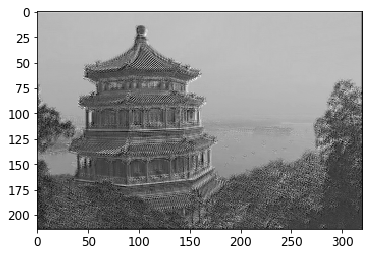

In [15]:
plt.imshow(output[0, :, :, 1], cmap="gray") # 첫 번째 이미지의 두 번째 특성 맵을 그림
plt.show()

### 13.2.4 메모리 요구사항

CNN에 관련된 문제는 역전파 알고리즘이 역방향 계산을 할 때 정방향에서 계산했던 모든 중간 값을 필요로 하기 때문에<br>
특히 훈련하는 동안에 합성곱층이 많은 양의 RAM을 필요로 한다는 점이다.<br>

예시로 5x5 필터로 스트라이드 1과 SAME 패딩을 사용해 150x100 크기의 특성 맵 200개를 만드는 합성곱층을 생각.<br>
입력 : 150x100 RGB 이미지 (채널 3개)<br>
파라미터 수 : (5x5x3+1) x 200 = 15,200개<br>
이 수는 완전 연결 층에 비해 상당히 적은 숫자지만, <br>
200개의 특성 맵마다 150x100개의 뉴런을 포함하고 있고, 각 뉴런은 5x5x3 = 75개의 입력에 대한 가중치 합을 계산해야 한다. <br>
그러므로 2억 2천 5백만개의 실수 곱셈이 있음 <br>
완전 연결 층 만큼 나쁘지는 않지만 계산량이 매우 많음 <br>
한 샘플에 대해서 특성 맵이 32비트 부동소수로 표현된다면, <br>
합성곱층의 출력이 RAM의 200x150x100x32 = 9천 6백만 비트 (약 11.4MB)를 점유할 것 <br>
훈련 배치가 100개의 샘플로 이루어져 있다면 이 층은 1GB의 RAM을 사용 할 것 <br>
새로운 샘플에 대한 예측을 만들 때, 하나의 층이 점유하고 있는 RAM은 다음 층의 계산이 완료되자마자 해제 될 수 있음.<br>
그러므로 연속된 두 개의 층에서 필요로 하는 만큼의 RAM만 가지고 있으면 됨 <br>
하지만 훈련하는 동안에는 정방향에서 계산했던 모든 값이 역방향을 위해 보존되어야 함. <br>
그래서 적어도 각 층에서 필요한 RAM 양의 전체 합만큼 필요하다. <br>

## 13. 3 풀링층

어떻게 합성곱층이 작동하는지 이해했다면 **풀링 층(Pooling layer)**은 매우 쉽게 이해 할 수 있다. <br>
이 층의 목적은 계산량과 메모리 사용량, 파라미터 수를 줄이기 위해 입력 이미지의 **부표본(subsample)**을 만드는 것 <br>
입력 이미지의 크기를 줄이면 이미지가 약간 이동해도 신경망이 영향을 덜 받는다. (위치 불변성) <br><br>

합성곱층과 마찬가지로 각 뉴런은 이전 층의 작은 사각 영역의 수용장 안에 있는 뉴런의 출력과 연결되어 있다. <br>
앞과 동일하게 크기, 스트라이드, 패딩 유형을 지정해야 한다. <br>
하지만 풀링 뉴런은 가중치가 없다. 즉, 최대나 평균 같은 합산 함수를 사용해 입력 값을 더하는 것이 전부이다. <br>
[그림 13-8]은 아주 널리 사용되는 풀링층인 **최대 풀링층(max pooling layer)**을 보여준다. <br>
아래 그림은 2x2 풀링 커널(pooling kernel)과 스트라이드 2를 사용하며 패딩은 없다. <br>
커널에서 가장 큰 입력같이 다음 층으로 전달되고 다른 값은 버려진다. <br>

<center><img src="images/13-8.png" width="80%" height="80%"></center> 

In [16]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # 수직선
filters[3, :, :, 1] = 1  # 수평선

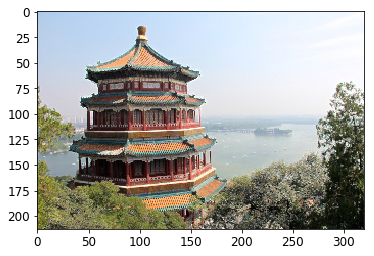

In [17]:
# 입력 X 와 최대 풀링층으로 된 그래프를 만든다.
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # 첫 번째 이미지의 출력을 그리기
plt.show()

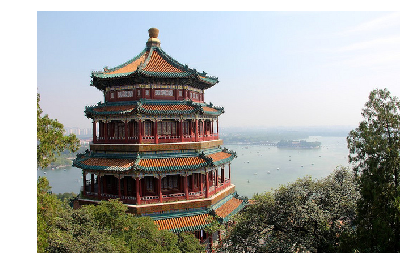

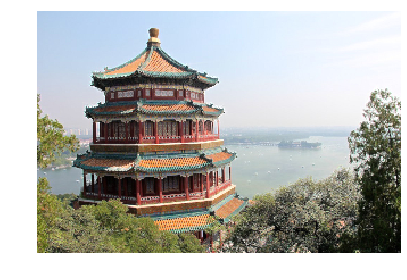

In [18]:
plot_color_image(dataset[0])
save_fig("china_original")
plt.show()
    
plot_color_image(output[0])
save_fig("china_max_pool")
plt.show()

ksize 매개변수에는 입력 텐서의 네 차원 [배치 크기, 높이, 너비, 채널] 방향으로 커널의 크기를 지정 <br>
텐서플로우는 현재 복수 개의 샘플에 대한 풀링을 지원하지 않음 <br>
그래서 ksize의 첫 번째 원소는 반드시 1이어야 한다. <br>
그리고 공간 차원(높이와 너비)과 깊이 차원 양방향으로 풀링을 제공하지 않는다. <br>
그러므로 반드시 ksize[1]과 ksize[2]가 1이거나 ksize[3]이 1이어야 한다. <br>

**평균 풀링층(average pooling layer)**을 만들기 위해서는 max_pool() 함수 대신 avg_pool() 함수를 사용하면 된다. <br>

In [2]:
# 시작하기전 돌리기!!
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [4]:
import tensorflow as tf